In [1]:
import os
os.chdir("/home/etaylor/pycharmProjects/thesis")

In [2]:
from src.annotation_handling.fast_labeling_workflow.fast_labeling_utils import visualize, train_model
from src.annotation_handling.segmentsai.segmentsai_handler import (setup_connection_segmentsai,
                                                visualize_dataset,
                                                create_dataset, 
                                                upload_images_to_segments,
                                                generate_and_upload_predictions
                                                )
from segments import SegmentsDataset

#### Setup Global Variables

In [3]:
client = setup_connection_segmentsai()
TRAIN_DATASET_NAME = 'etaylor/cannabis_patches_all_images'

#### 1. Upload your images and label a small subset

##### Vizualize dataset images with masks

In [ ]:
# Visualize the dataset
visualize_dataset(client, TRAIN_DATASET_NAME)

#### 2. Train a segmentation model on the labeled images


In [4]:
# Initialize a dataset from the release file
release = client.get_release(TRAIN_DATASET_NAME, 'v0.1')
dataset = SegmentsDataset(release)

Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 74/74 [00:00<00:00, 1059.95it/s]

Initialized dataset with 74 images.


In [5]:
# Train an instance segmentation model on the dataset
model = train_model(dataset)

Exporting dataset. This may take a while...


100%|██████████| 74/74 [00:02<00:00, 35.48it/s]


Exported to ./export_coco-instance_etaylor_cannabis_patches_all_images_v0.1.json. Images in segments/etaylor_cannabis_patches_all_images/v0.1
Metadata(name='my_dataset', json_file='./export_coco-instance_etaylor_cannabis_patches_all_images_v0.1.json', image_root='segments/etaylor_cannabis_patches_all_images/v0.1', evaluator_type='coco', thing_classes=['trichome'])
/home/etaylor/pycharmProjects/thesis/src/segmentation/models/detectron2/detectron2/model_zoo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml
[10/04 18:25:00 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[10/04 18:25:02 d2.engine.train_loop]: Starting training from iteration 0


/home/etaylor/pycharmProjects/thesis/src/segmentation/models/detectron2/detectron2/data/detection_utils.py:446: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  torch.stack([torch.from_numpy(np.ascontiguousarray(x)) for x in masks])
/home/etaylor/pycharmProjects/thesis/src/segmentation/models/detectron2/detectron2/data/detection_utils.py:446: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type 

[10/04 18:25:23 d2.utils.events]:  eta: 0:01:14  iter: 19  total_loss: 4.349  loss_cls: 0.7056  loss_box_reg: 0.6736  loss_mask: 0.6922  loss_rpn_cls: 2.091  loss_rpn_loc: 0.153    time: 0.2777  last_time: 0.2877  data_time: 0.0645  last_data_time: 0.0067   lr: 1.6068e-05  max_mem: 1830M
[10/04 18:25:30 d2.utils.events]:  eta: 0:01:06  iter: 39  total_loss: 2.373  loss_cls: 0.6155  loss_box_reg: 0.6922  loss_mask: 0.6631  loss_rpn_cls: 0.2869  loss_rpn_loc: 0.1145    time: 0.2699  last_time: 0.1916  data_time: 0.0350  last_data_time: 0.0175   lr: 3.2718e-05  max_mem: 1830M
[10/04 18:25:35 d2.utils.events]:  eta: 0:00:57  iter: 59  total_loss: 2.081  loss_cls: 0.531  loss_box_reg: 0.7484  loss_mask: 0.5884  loss_rpn_cls: 0.09316  loss_rpn_loc: 0.09392    time: 0.2585  last_time: 0.1880  data_time: 0.0238  last_data_time: 0.0110   lr: 4.9367e-05  max_mem: 1836M
[10/04 18:25:40 d2.utils.events]:  eta: 0:00:52  iter: 79  total_loss: 1.923  loss_cls: 0.4671  loss_box_reg: 0.7689  loss_mask:

#### Create a new dataset and upload images to him

In [6]:
# Directory containing your images
image_name = "IMG_2145"
week = "week9_3xzoom_regular"

name = f"trichomes_patches_{week}_{image_name}"
description = f"Trichomes patches week {week} of image {image_name}."
task_type = "segmentation-bitmap"
task_attributes = {
    "format_version": "0.1",
    "categories": [
        {"name": "trichome", "id": 1},
    ]
}

absolute_images_path = f"/home/etaylor/images/images_patches/cannabis_patches/{week}/{image_name}"
sharpness_absolute_images_path = f"/home/etaylor/images/images_patches/cannabis_patches/testing_methods/preprocess_by_sharpness/{week}/{image_name}"

dataset_name_test = f"etaylor/{name}"


In [7]:
#Create the dataset:
dataset_test = create_dataset(client, name, description, task_type, task_attributes)
print(dataset_test)

name='trichomes_patches_week9_3xzoom_regular_IMG_2145' full_name='etaylor/trichomes_patches_week9_3xzoom_regular_IMG_2145' cloned_from=None description='Trichomes patches week week9_3xzoom_regular of image IMG_2145.' category='other' public=False owner=Owner(username='etaylor', created_at='2022-12-28T12:53:18Z', email=None) created_at='2023-10-04T15:29:52.497701Z' enable_ratings=False enable_skip_labeling=True enable_skip_reviewing=False enable_save_button=False enable_label_status_verified=False enable_same_dimensions_track_constraint=False enable_interpolation=True task_type='segmentation-bitmap' label_stats=LabelStats(TOTAL=None, LABELED=None, UNLABELED=None, PRELABELED=None) samples_count=0 collaborators_count=None task_attributes=TaskAttributes(format_version='0.1', categories=[TaskAttributeCategory(name='trichome', id=1, color=None, has_instances=None, attributes=None, dimensions=None)], image_attributes=None) labelsets=None role=None readme='' metadata={} noncollaborator_can_lab

### Upload the Images that are not annotaed to the dataset

In [8]:
upload_images_to_segments(client, dataset_name_test, absolute_images_path)

Sample IMG_2145_p0.jpg added: uuid='0f959c70-396f-42fe-b84b-c3735d9d54d6' name='IMG_2145_p0.jpg' attributes=ImageSampleAttributes(image=URL(url='https://segmentsai-prod.s3.eu-west-2.amazonaws.com/assets/etaylor/8dac563b-c24a-4f3a-872b-6596a4431ac8.jpg')) metadata={} created_at='2023-10-04T15:29:57.829893Z' created_by='etaylor' assigned_labeler=None assigned_reviewer=None comments=[] priority=0.0 has_embedding=False label=None issues=None dataset_full_name=None
Sample IMG_2145_p1.jpg added: uuid='33a3a574-4d8c-46d7-b796-6f28053dc7e0' name='IMG_2145_p1.jpg' attributes=ImageSampleAttributes(image=URL(url='https://segmentsai-prod.s3.eu-west-2.amazonaws.com/assets/etaylor/2ee131fc-d8bd-44fc-8ef9-03c11fc81f36.jpg')) metadata={} created_at='2023-10-04T15:29:58.315427Z' created_by='etaylor' assigned_labeler=None assigned_reviewer=None comments=[] priority=0.0 has_embedding=False label=None issues=None dataset_full_name=None
Sample IMG_2145_p2.jpg added: uuid='0466c7fa-1352-4c20-9c07-f7656582a8

#### Create a new release to the new dataset

In [9]:
name = 'v0.1'
description = 'upload predictions to datset.'
release = client.add_release(dataset_name_test, name, description)
# if the release is already existing, you can get it with:
# release = client.get_release(dataset_name_test, name)
print(release)

uuid='c90f2bbe-e2c6-416b-9324-94aaf2ba5fb3' name='v0.1' description='upload predictions to datset.' release_type='JSON' attributes=URL(url='') status='PENDING' created_at='2023-10-04T15:30:17.664729Z' samples_count=21


Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 21/21 [00:01<00:00, 10.69it/s]


Initialized dataset with 21 images.


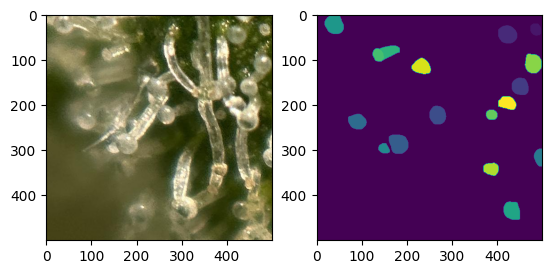

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}]


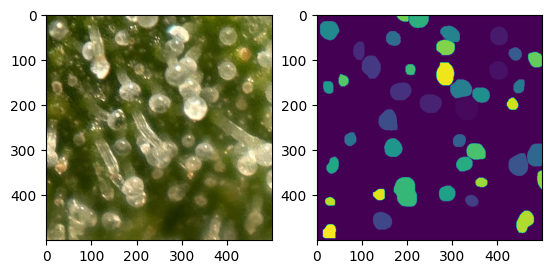

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}, {'id': 18, 'category_id': 1}, {'id': 19, 'category_id': 1}, {'id': 20, 'category_id': 1}, {'id': 21, 'category_id': 1}, {'id': 22, 'category_id': 1}, {'id': 23, 'category_id': 1}, {'id': 24, 'category_id': 1}, {'id': 25, 'category_id': 1}, {'id': 26, 'category_id': 1}, {'id': 27, 'category_id': 1}, {'id': 28, 'category_id': 1}, {'id': 29, 'category_id': 1}, {'id': 30, 'category_id': 1}, {'id': 31, 'category_id': 1}, {'id': 32, 'category_id': 1}, {'id': 33, 'category_id': 1}, {'id': 34, 'catego

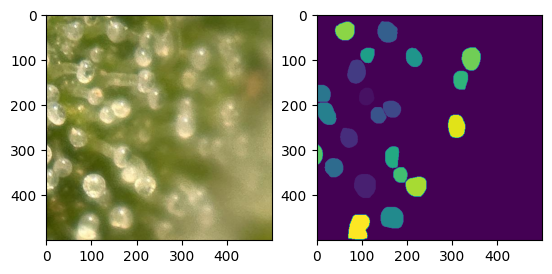

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}, {'id': 18, 'category_id': 1}, {'id': 19, 'category_id': 1}, {'id': 20, 'category_id': 1}, {'id': 21, 'category_id': 1}, {'id': 22, 'category_id': 1}, {'id': 23, 'category_id': 1}]


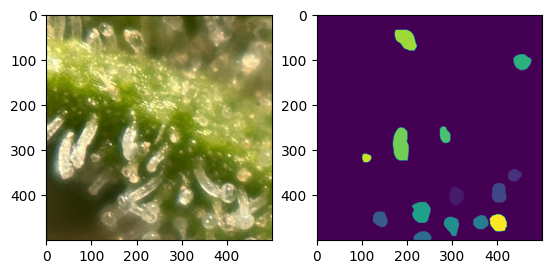

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}]


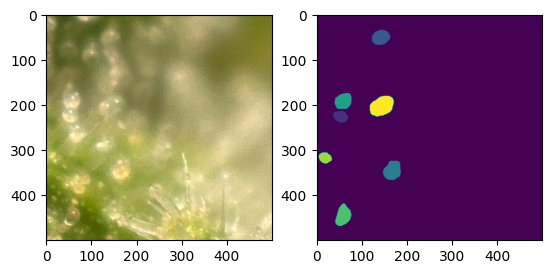

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}]


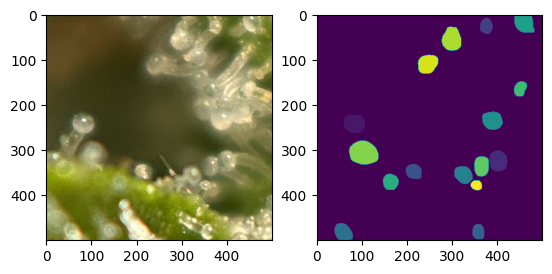

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}]


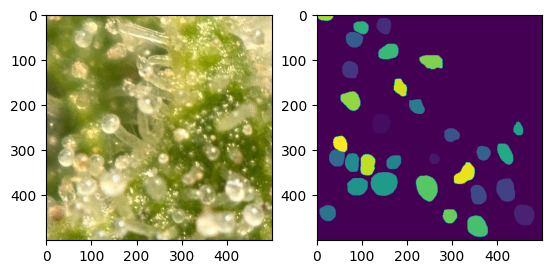

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}, {'id': 18, 'category_id': 1}, {'id': 19, 'category_id': 1}, {'id': 20, 'category_id': 1}, {'id': 21, 'category_id': 1}, {'id': 22, 'category_id': 1}, {'id': 23, 'category_id': 1}, {'id': 24, 'category_id': 1}, {'id': 25, 'category_id': 1}, {'id': 26, 'category_id': 1}, {'id': 27, 'category_id': 1}, {'id': 28, 'category_id': 1}, {'id': 29, 'category_id': 1}, {'id': 30, 'category_id': 1}, {'id': 31, 'category_id': 1}]


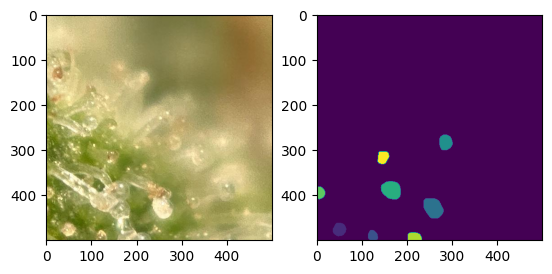

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}]


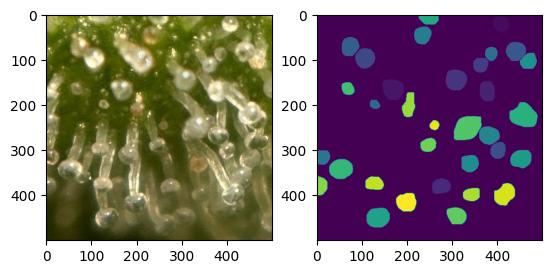

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}, {'id': 18, 'category_id': 1}, {'id': 19, 'category_id': 1}, {'id': 20, 'category_id': 1}, {'id': 21, 'category_id': 1}, {'id': 22, 'category_id': 1}, {'id': 23, 'category_id': 1}, {'id': 24, 'category_id': 1}, {'id': 25, 'category_id': 1}, {'id': 26, 'category_id': 1}, {'id': 27, 'category_id': 1}, {'id': 28, 'category_id': 1}, {'id': 29, 'category_id': 1}, {'id': 30, 'category_id': 1}, {'id': 31, 'category_id': 1}, {'id': 32, 'category_id': 1}, {'id': 33, 'category_id': 1}]


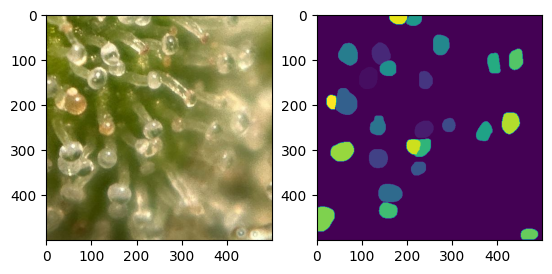

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}, {'id': 18, 'category_id': 1}, {'id': 19, 'category_id': 1}, {'id': 20, 'category_id': 1}, {'id': 21, 'category_id': 1}, {'id': 22, 'category_id': 1}, {'id': 23, 'category_id': 1}, {'id': 24, 'category_id': 1}, {'id': 25, 'category_id': 1}, {'id': 26, 'category_id': 1}]


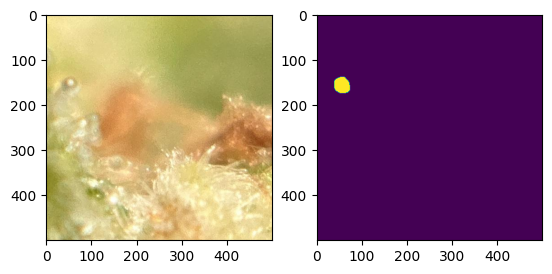

[{'id': 1, 'category_id': 1}]


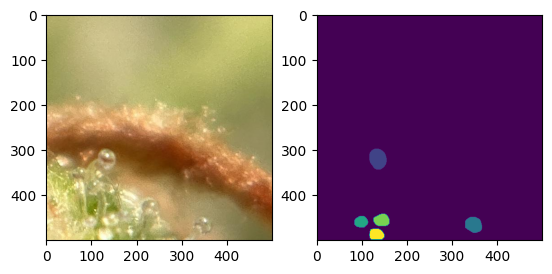

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}]


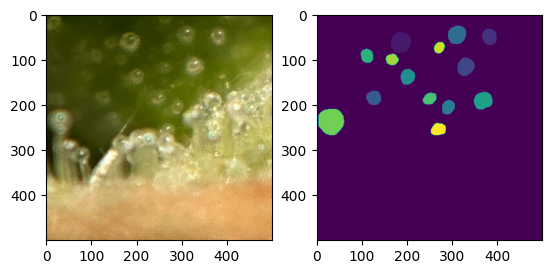

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}]


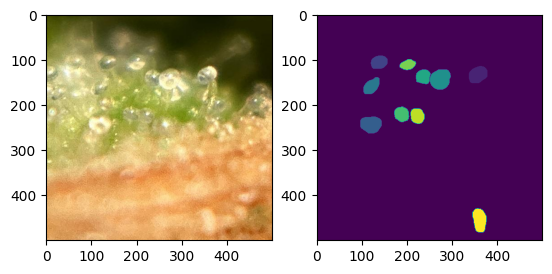

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}]


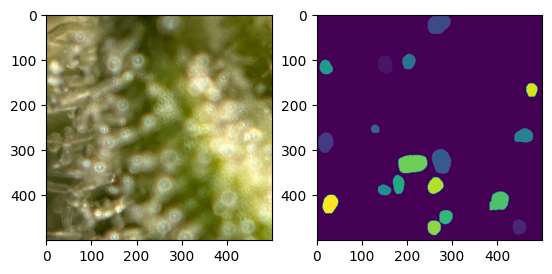

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}, {'id': 18, 'category_id': 1}]


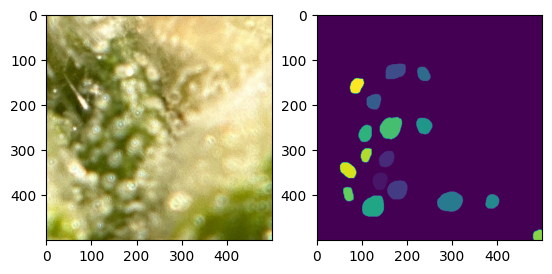

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}]


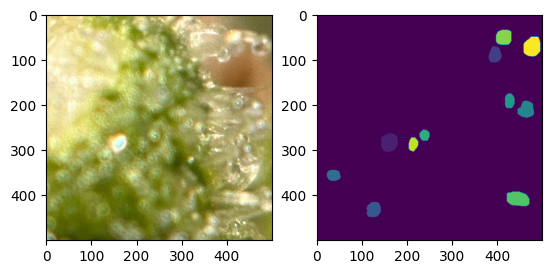

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}]


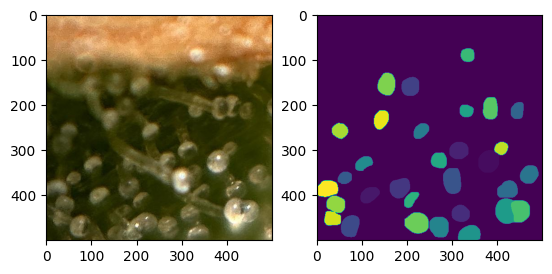

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}, {'id': 18, 'category_id': 1}, {'id': 19, 'category_id': 1}, {'id': 20, 'category_id': 1}, {'id': 21, 'category_id': 1}, {'id': 22, 'category_id': 1}, {'id': 23, 'category_id': 1}, {'id': 24, 'category_id': 1}, {'id': 25, 'category_id': 1}, {'id': 26, 'category_id': 1}, {'id': 27, 'category_id': 1}, {'id': 28, 'category_id': 1}, {'id': 29, 'category_id': 1}, {'id': 30, 'category_id': 1}, {'id': 31, 'category_id': 1}]


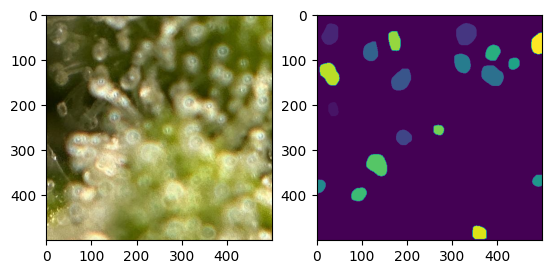

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}, {'id': 18, 'category_id': 1}, {'id': 19, 'category_id': 1}]


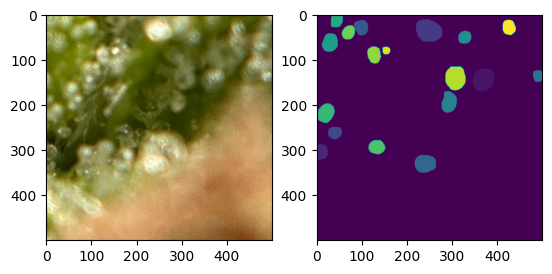

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}, {'id': 18, 'category_id': 1}]


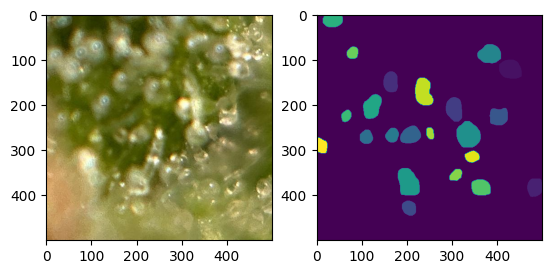

[{'id': 1, 'category_id': 1}, {'id': 2, 'category_id': 1}, {'id': 3, 'category_id': 1}, {'id': 4, 'category_id': 1}, {'id': 5, 'category_id': 1}, {'id': 6, 'category_id': 1}, {'id': 7, 'category_id': 1}, {'id': 8, 'category_id': 1}, {'id': 9, 'category_id': 1}, {'id': 10, 'category_id': 1}, {'id': 11, 'category_id': 1}, {'id': 12, 'category_id': 1}, {'id': 13, 'category_id': 1}, {'id': 14, 'category_id': 1}, {'id': 15, 'category_id': 1}, {'id': 16, 'category_id': 1}, {'id': 17, 'category_id': 1}, {'id': 18, 'category_id': 1}, {'id': 19, 'category_id': 1}, {'id': 20, 'category_id': 1}, {'id': 21, 'category_id': 1}, {'id': 22, 'category_id': 1}]


In [11]:
generate_and_upload_predictions(client, dataset_name_test, model, visualize_flag=True)

In [ ]:
# Delete the dataset - ONLY IF YOU WANT TO DELETE THE DATASET!!!
client.delete_dataset("etaylor/trichomes_patches_week8_zoom3_regular_IMG_IMG_1809")